In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pickle as rick
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_tau = 1776.86E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
pi = np.pi
SW = sin
CW = cos
MZ2 = m_Z ** 2

m = m_m
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

CeB = 10 ** -10
CeW = CeB
CeH = 10 ** -10
CHB = 2 * 10 ** -10
CHW = 10 ** -10
CHD = 10 ** -10
CHWB = CHD
CHbox = 10 ** -10
CHAA = cos ** 2 * CHB + sin ** 2 * CHW - sin * cos * CHWB
CHAZ = 2 * sin * cos * (CHW - CHB) - (cos ** 2 - sin ** 2) * CHWB
bins = 200

def scale(l, ieB, ieW, ieH, iHD, iHbox, iHB, iHW, iHWB):
    
    HAA = cos ** 2 * iHB + sin ** 2 * iHW - sin * cos * iHWB
    HAZ = 2 * sin * cos * (iHW - iHB) - (cos ** 2 - sin ** 2) * iHWB
    init = (m / (v * 10 ** 6)) * np.array([HAA, HAZ, ieB, ieW, ieH, iHD, iHbox, iHB, iHW, iHWB])
    I = []
    
    SM4 = l[0]
    
    AA6 = (init[0] / CHAA) * l[1]
    AZ6 = (init[1] / CHAZ) * l[2]
    eBeW6 = ((sin * init[3] - cos * init[2]) / (sin * CeW - cos * CeB)) * l[3]
    rem1 = (init[4] / CeH) * l[4]
    rem2 = ((init[5]*(2*cos**2 - 1)+ 4*sin*(init[9]*cos + init[6]*sin)) / (CHD*(2*cos**2 - 1)+ 4*sin*(CHWB*cos + CHbox*sin))) * l[5]
    
    AA8 = (init[0] ** 2 / CHAA ** 2) * l[6]
    AZ8 = (init[1] ** 2 / CHAZ ** 2) * l[7]
    AAAZ8 = ((init[0] * init[1]) / (CHAA * CHAZ)) * l[8]
    eBeW8 = ((cos * init[2] - sin * init[3]) ** 2 / (cos * CeB - sin * CeW) ** 2) * l[9]
    rem8 = (init[4] ** 2 / CeH ** 2) * l[10]
    
    SMLoop4 = l[11]
    
    SMLoop6 = l[12]
    AALoop6 = (init[0] / CHAA) * l[13]
    AZLoop6 = (init[1] / CHAZ) * l[14]
    eBeWLoop6 = ((cos * init[2] - sin * init[3]) / (cos * CeB - sin * CeW)) * l[15]
    rem1Loop6 = (init[4] / CeH) * l[16]
    rem2Loop6 = ((init[5]*(2*cos**2 - 1) + 4*init[9]*cos*sin + 4*init[6]*sin**2) / (CHD*(2*cos**2 - 1) + 4*CHWB*cos*sin + 4*CHbox*sin**2)) * l[17]
    
    I.append(SM4)
    I.append(AA6)
    I.append(AZ6)
    I.append(eBeW6)
    I.append(rem1)
    I.append(rem2)
    I.append(AA8)
    I.append(AZ8)
    I.append(AAAZ8)
    I.append(eBeW8)
    I.append(rem8)
    I.append(SMLoop4)
    I.append(SMLoop6)
    I.append(AALoop6)
    I.append(AZLoop6)
    I.append(eBeWLoop6)
    I.append(rem1Loop6)
    I.append(rem2Loop6)
    
    return I

def scale_anim(l, CHBs, CHWs, CHWBs, CeHs, CeBs, CeWs, CHboxs, CHDs):
    I = []
    for i in range(0, len(C_HBs)):
        
        CHAAi = cos ** 2 * CHBs[i] + sin ** 2 * CHWs[i] - sin * cos * CHWBs[i]
        CHAZi = 2 * sin * cos * (CHWs[i] - CHBs[i]) - (cos ** 2 - sin ** 2) * CHWBs[i]
        
        SM4 = l[0]
    
        AA6 = (CHAAi / CHAA) * l[1]
        AZ6 = (CHAZi / CHAZ) * l[2]
        eBeW6 = ((sin * CeWs[i] - cos * CeBs[i]) / (sin * CeW - cos * CeB)) * l[3]
        rem1 = (CeHs[i] / CeH) * l[4]
        rem2 = ((CHDs[i]*(2*cos**2 - 1)+ 4*sin*(CHWBs[i]*cos + CHboxs[i]*sin)) / (CHD*(2*cos**2 - 1)+ 4*sin*(CHWB*cos + CHbox*sin))) * l[5]
    
        AA8 = (CHAAi ** 2 / CHAA ** 2) * l[6]
        AZ8 = (CHAZi ** 2 / CHAZ ** 2) * l[7]
        AAAZ8 = ((CHAAi * CHAZi) / (CHAA * CHAZ)) * l[8]
        eBeW8 = ((cos * CeBs[i] - sin * CeWs[i]) ** 2 / (cos * CeB - sin * CeW) ** 2) * l[9]
        rem8 = (CeHs[i] ** 2 / CeH ** 2) * l[10]
        
        SMLoop4 = l[11]
        
        SMLoop6 = l[12]
        AALoop6 = (CHAAi / CHAA) * l[13]
        AZLoop6 = (CHAZi / CHAZ) * l[14]
        eBeWLoop6 = ((cos * CeBs[i] - sin * CeWs[i]) / (cos * CeB - sin * CeW)) * l[15]
        rem1Loop6 = (CeHs[i] / CeH) * l[16]
        rem2Loop6 = ((CHDs[i]*(2*cos**2 - 1) + 4*CHWBs[i]*cos*sin + 4*CHboxs[i]*sin**2) / (CHD*(2*cos**2 - 1) + 4*CHWB*cos*sin + 4*CHbox*sin**2)) * l[17]

        I.append(np.concatenate((SM4, AA6, AZ6, eBeW6, rem1, rem2, AA8, AZ8, AAAZ8, eBeW8, rem8, SMLoop4, SMLoop6, AALoop6, AZLoop6, eBeWLoop6, rem1Loop6, rem2Loop6), axis = 0))
    return np.array(I)

<ipython-input-2-58cce891a760>:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([2*10**-7,0*10**-7,2*10**-7,4*10**-7,6*10**-7,8*10**-7], fontsize=16)
<ipython-input-2-58cce891a760>:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1], fontsize=16)


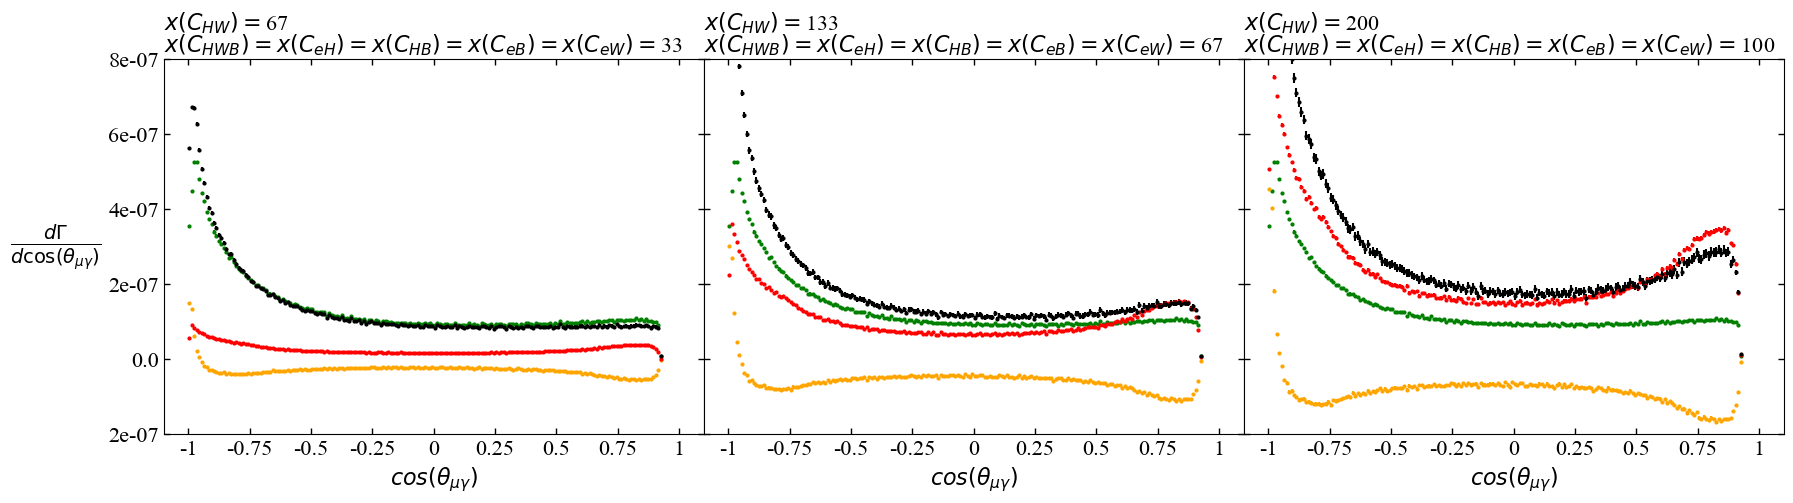

In [2]:
num = 100

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
C_HWs = 2 * C_HBs
C_HWBs = C_HBs
C_eHs = C_HBs
C_eBs = C_HBs
C_eWs = C_eBs
C_Hboxs = np.zeros(num)
C_HDs = np.zeros(num)

norm = 2 / bins
keV = 1
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos4_1 = np.array(rick.load(open('I_cos41_Tree', 'rb')))
I_cos6_1 = np.array(rick.load(open('I_cos61_Tree', 'rb')))
I_cos6_2 = np.array(rick.load(open('I_cos62_Tree', 'rb')))
I_cos6_3 = np.array(rick.load(open('I_cos63_Tree', 'rb')))
I_cos6_4 = np.array(rick.load(open('I_cos64_Tree', 'rb')))
I_cos6_5 = np.array(rick.load(open('I_cos65_Tree', 'rb')))
I_cos8_6 = np.array(rick.load(open('I_cos86_Tree', 'rb')))
I_cos8_7 = np.array(rick.load(open('I_cos87_Tree', 'rb')))
I_cos8_8 = np.array(rick.load(open('I_cos88_Tree', 'rb')))
I_cos8_9 = np.array(rick.load(open('I_cos89_Tree', 'rb')))
I_cos8_10 = np.array(rick.load(open('I_cos810_Tree', 'rb')))

I_cosLoop4_1 = np.array(rick.load(open('I_cos41_Loop-Copy1', 'rb')))
I_cosLoop6_1 = np.array(rick.load(open('I_cos61_Loop-Copy1', 'rb')))
I_cosLoop6_2 = np.array(rick.load(open('I_cos62_Loop-Copy1', 'rb')))
I_cosLoop6_3 = np.array(rick.load(open('I_cos63_Loop-Copy1', 'rb')))
I_cosLoop6_4 = np.array(rick.load(open('I_cos64_Loop-Copy1', 'rb')))
I_cosLoop6_5 = np.array(rick.load(open('I_cos65_Loop-Copy1', 'rb')))
I_cosLoop6_6 = np.array(rick.load(open('I_cos66_Loop-Copy1', 'rb')))

mas_ls = [I_cos4_1, I_cos6_1, I_cos6_2, I_cos6_3, I_cos6_4, I_cos6_5, I_cos8_6, I_cos8_7, I_cos8_8, I_cos8_9, I_cos8_10, I_cosLoop4_1, I_cosLoop6_1, I_cosLoop6_2, I_cosLoop6_3, I_cosLoop6_4, I_cosLoop6_5, I_cosLoop6_6]

def cos_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs):
    k = 1 / norm
    return k * scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)

def cos_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(11, 13):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def cos_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 6):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(13, 18):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def cos_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(6, 11):
        cos_8sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_8errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,5))

ax1.errorbar(cos_s[0:193], cos_4sum_init(round((num-1)/3))[0][0:193],  color = 'green', label = 'SM', yerr = cos_4sum_init(round((num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax1.errorbar(cos_s[0:193], cos_6sum_init(round((num-1)/3))[0][0:193],  color = 'orange', label = 'SM-SMEFT', yerr = cos_6sum_init(round((num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax1.errorbar(cos_s[0:193], cos_8sum_init(round((num-1)/3))[0][0:193],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_8sum_init(round((num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax1.errorbar(cos_s[0:193], cos_4sum_init(round((num-1)/3))[0][0:193]+cos_6sum_init(round((num-1)/3))[0][0:193]+cos_8sum_init(round((num-1)/3))[0][0:193],  color = 'black', label = 'Total', yerr = cos_4sum_init(round((num-1)/3))[1][0:193]+cos_6sum_init(round((num-1)/3))[1][0:193]+cos_8sum_init(round((num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax1.text(-1.1, 0.82*10**-6, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[round((num-1)/3)] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)
ax1.text(-1.1, 0.88*10**-6, r'$x(C_{HW})=$' +str(round(C_HWs[round((num-1)/3)] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)

ax2.errorbar(cos_s[0:193], cos_4sum_init(round(2*(num-1)/3))[0][0:193],  color = 'green', label = 'SM', yerr = cos_4sum_init(round(2*(num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax2.errorbar(cos_s[0:193], cos_6sum_init(round(2*(num-1)/3))[0][0:193],  color = 'orange', label = 'SM-SMEFT', yerr = cos_6sum_init(round(2*(num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax2.errorbar(cos_s[0:193], cos_8sum_init(round(2*(num-1)/3))[0][0:193],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_8sum_init(round(2*(num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax2.errorbar(cos_s[0:193], cos_4sum_init(round(2*(num-1)/3))[0][0:193]+cos_6sum_init(round(2*(num-1)/3))[0][0:193]+cos_8sum_init(round(2*(num-1)/3))[0][0:193],  color = 'black', label = 'Total', yerr = cos_4sum_init(round(2*(num-1)/3))[1][0:193]+cos_6sum_init(round(2*(num-1)/3))[1][0:193]+cos_8sum_init(round(2*(num-1)/3))[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax2.text(-1.1, 0.82*10**-6, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[round(2*(num-1)/3)] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)
ax2.text(-1.1, 0.88*10**-6, r'$x(C_{HW})=$' +str(round(C_HWs[round(2*(num-1)/3)] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)

ax3.errorbar(cos_s[0:193], cos_4sum_init(num-1)[0][0:193],  color = 'green', label = 'SM', yerr = cos_4sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax3.errorbar(cos_s[0:193], cos_6sum_init(num-1)[0][0:193],  color = 'orange', label = 'SM-SMEFT', yerr = cos_6sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax3.errorbar(cos_s[0:193], cos_8sum_init(num-1)[0][0:193],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_8sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax3.errorbar(cos_s[0:193], cos_4sum_init(num-1)[0][0:193]+cos_6sum_init(num-1)[0][0:193]+cos_8sum_init(num-1)[0][0:193],  color = 'black', label = 'Total', yerr = cos_4sum_init(num-1)[1][0:193]+cos_6sum_init(num-1)[1][0:193]+cos_8sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax3.text(-1.1, 0.82*10**-6, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)
ax3.text(-1.1, 0.88*10**-6, r'$x(C_{HW})=$' +str(round(C_HWs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize=16)

ax1.set_ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize=20)
ax1.yaxis.set_label_coords(-0.2, 0.435)
ax1.set_yticklabels([2*10**-7,0*10**-7,2*10**-7,4*10**-7,6*10**-7,8*10**-7], fontsize=16)
ax1.yaxis.major.formatter._useMathText = True
#ax1.yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
ax1.set_position([0.1,0.15,0.3,0.75])
ax2.set_position([0.4,0.15,0.3,0.75])
ax3.set_position([0.7,0.15,0.3,0.75])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

for ax in (ax1, ax2, ax3):
    ax.tick_params(direction='in', length=4, width=1, right=True, top=True)
    ax.tick_params(which = 'minor', direction='in', length=2, width=1, right=True, top=True)
    ax.set(xlim=(-1.1,1.1), ylim=(-0.2*10**-6, 0.8*10**-6))
    ax.set_xlabel(r'$cos(\theta_{\mu\gamma})$', fontsize=16)
    ax.set_xticklabels([-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1], fontsize=16)

plt.savefig('cos_lk_three_alt.eps')
plt.show()

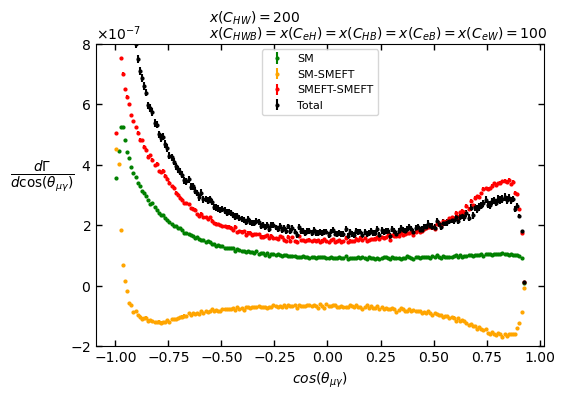

In [3]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 100

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
#C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWs = 2 * C_HBs
C_HWBs = C_HBs
C_eHs = C_HBs
#C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eBs = C_HBs
C_eWs = C_eBs
C_Hboxs = np.zeros(num)
C_HDs = np.zeros(num)

norm = 2 / bins
keV = 1
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos4_1 = np.array(rick.load(open('I_cos41_Tree', 'rb')))
I_cos6_1 = np.array(rick.load(open('I_cos61_Tree', 'rb')))
I_cos6_2 = np.array(rick.load(open('I_cos62_Tree', 'rb')))
I_cos6_3 = np.array(rick.load(open('I_cos63_Tree', 'rb')))
I_cos6_4 = np.array(rick.load(open('I_cos64_Tree', 'rb')))
I_cos6_5 = np.array(rick.load(open('I_cos65_Tree', 'rb')))
I_cos8_6 = np.array(rick.load(open('I_cos86_Tree', 'rb')))
I_cos8_7 = np.array(rick.load(open('I_cos87_Tree', 'rb')))
I_cos8_8 = np.array(rick.load(open('I_cos88_Tree', 'rb')))
I_cos8_9 = np.array(rick.load(open('I_cos89_Tree', 'rb')))
I_cos8_10 = np.array(rick.load(open('I_cos810_Tree', 'rb')))

I_cosLoop4_1 = np.array(rick.load(open('I_cos41_Loop-Copy1', 'rb')))
I_cosLoop6_1 = np.array(rick.load(open('I_cos61_Loop-Copy1', 'rb')))
I_cosLoop6_2 = np.array(rick.load(open('I_cos62_Loop-Copy1', 'rb')))
I_cosLoop6_3 = np.array(rick.load(open('I_cos63_Loop-Copy1', 'rb')))
I_cosLoop6_4 = np.array(rick.load(open('I_cos64_Loop-Copy1', 'rb')))
I_cosLoop6_5 = np.array(rick.load(open('I_cos65_Loop-Copy1', 'rb')))
I_cosLoop6_6 = np.array(rick.load(open('I_cos66_Loop-Copy1', 'rb')))

mas_ls = [I_cos4_1, I_cos6_1, I_cos6_2, I_cos6_3, I_cos6_4, I_cos6_5, I_cos8_6, I_cos8_7, I_cos8_8, I_cos8_9, I_cos8_10, I_cosLoop4_1, I_cosLoop6_1, I_cosLoop6_2, I_cosLoop6_3, I_cosLoop6_4, I_cosLoop6_5, I_cosLoop6_6]

def cos_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs):
    k = 1 / norm
    return k * scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)

def cos_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(11, 13):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

#print(scale_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs))
def cos_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 6):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(13, 18):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def cos_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(6, 11):
        cos_8sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_8errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])


ax.yaxis.major.formatter._useMathText = True
plt.ylim(-0.2*10**-6, 0.8*10**-6)
#plt.ylim(5*10**-8, 2*10**-6)
#plt.yscale('log')
ax.errorbar(cos_s[0:193], cos_4sum_init(num-1)[0][0:193],  color = 'green', label = 'SM', yerr = cos_4sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_s[0:193], cos_6sum_init(num-1)[0][0:193],  color = 'orange', label = 'SM-SMEFT', yerr = cos_6sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_s[0:193], cos_8sum_init(num-1)[0][0:193],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_8sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax.tick_params(direction='in', length=4, width=1, right=True, top=True)
ax.tick_params(which = 'minor', direction='in', length=2, width=1, right=True, top=True)
ax.errorbar(cos_s[0:193], cos_4sum_init(num-1)[0][0:193]+cos_6sum_init(num-1)[0][0:193]+cos_8sum_init(num-1)[0][0:193],  color = 'black', label = 'Total', yerr = cos_4sum_init(num-1)[1][0:193]+cos_6sum_init(num-1)[1][0:193]+cos_8sum_init(num-1)[1][0:193], ls = 'none', markersize = 4, marker = '.')
ax.text(-0.56, 0.82*10**-6, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.text(-0.56, 0.87*10**-6, r'$x(C_{HW})=$' +str(round(C_HWs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.12, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.legend(loc='upper center', fontsize = 8)

#plt.savefig('cos_lk.eps')
plt.show()

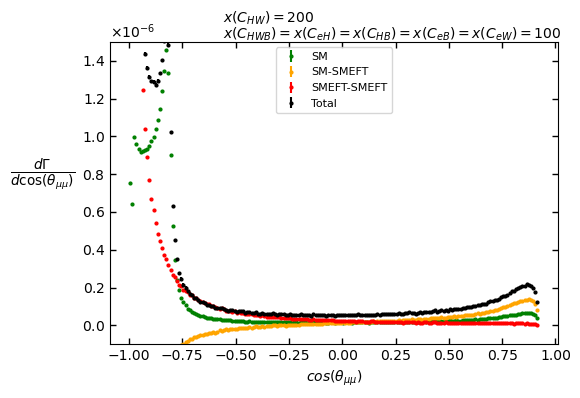

In [2]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 100

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
#C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWs = 2 * C_HBs
C_HWBs = C_HBs
C_eHs = C_HBs
#C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eBs = C_HBs
C_eWs = C_eBs
C_Hboxs = np.zeros(num)
C_HDs = np.zeros(num)

norm = 2 / bins
keV = 1
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos_alt4_1 = np.array(rick.load(open('I_cosalt41_Tree', 'rb')))
I_cos_alt6_1 = np.array(rick.load(open('I_cosalt61_Tree', 'rb')))
I_cos_alt6_2 = np.array(rick.load(open('I_cosalt62_Tree', 'rb')))
I_cos_alt6_3 = np.array(rick.load(open('I_cosalt63_Tree', 'rb')))
I_cos_alt6_4 = np.array(rick.load(open('I_cosalt64_Tree', 'rb')))
I_cos_alt6_5 = np.array(rick.load(open('I_cosalt65_Tree', 'rb')))
I_cos_alt8_6 = np.array(rick.load(open('I_cosalt86_Tree', 'rb')))
I_cos_alt8_7 = np.array(rick.load(open('I_cosalt87_Tree', 'rb')))
I_cos_alt8_8 = np.array(rick.load(open('I_cosalt88_Tree', 'rb')))
I_cos_alt8_9 = np.array(rick.load(open('I_cosalt89_Tree', 'rb')))
I_cos_alt8_10 = np.array(rick.load(open('I_cosalt810_Tree', 'rb')))

I_cos_altLoop4_1 = np.array(rick.load(open('I_cosalt41_Loop-Copy1', 'rb')))
I_cos_altLoop6_1 = np.array(rick.load(open('I_cosalt61_Loop-Copy1', 'rb')))
I_cos_altLoop6_2 = np.array(rick.load(open('I_cosalt62_Loop-Copy1', 'rb')))
I_cos_altLoop6_3 = np.array(rick.load(open('I_cosalt63_Loop-Copy1', 'rb')))
I_cos_altLoop6_4 = np.array(rick.load(open('I_cosalt64_Loop-Copy1', 'rb')))
I_cos_altLoop6_5 = np.array(rick.load(open('I_cosalt65_Loop-Copy1', 'rb')))
I_cos_altLoop6_6 = np.array(rick.load(open('I_cosalt66_Loop-Copy1', 'rb')))

mas_ls = [I_cos_alt4_1, I_cos_alt6_1, I_cos_alt6_2, I_cos_alt6_3, I_cos_alt6_4, I_cos_alt6_5, I_cos_alt8_6, I_cos_alt8_7, I_cos_alt8_8, I_cos_alt8_9, I_cos_alt8_10, I_cos_altLoop4_1, I_cos_altLoop6_1, I_cos_altLoop6_2, I_cos_altLoop6_3, I_cos_altLoop6_4, I_cos_altLoop6_5, I_cos_altLoop6_6]

def cos_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs):
    k = keV / norm
    return k * scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)

def cos_alt_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(11, 13):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def cos_alt_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 6):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(13, 18):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def cos_alt_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(6, 11):
        cos_8sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_8errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

ax.yaxis.major.formatter._useMathText = True
plt.ylim(-1*10**-7, 1.5*10**-6)
#plt.ylim(10**-8, 10**-5)
#plt.yscale('log')
ax.errorbar(cos_s[0:192], cos_alt_4sum_init(num-1)[0][0:192],  color = 'green', label = 'SM', yerr = cos_alt_4sum_init(num-1)[1][0:192], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_s[0:192], cos_alt_6sum_init(num-1)[0][0:192],  color = 'orange', label = 'SM-SMEFT', yerr = cos_alt_6sum_init(num-1)[1][0:192], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_s[0:192], cos_alt_8sum_init(num-1)[0][0:192],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_alt_8sum_init(num-1)[1][0:192], ls = 'none', markersize = 4, marker = '.')
ax.tick_params(direction='in', length=4, width=1, right=True, top=True)
ax.tick_params(which = 'minor', direction='in', length=2, width=1, right=True, top=True)
ax.errorbar(cos_s[0:192], cos_alt_4sum_init(num-1)[0][0:192]+cos_alt_6sum_init(num-1)[0][0:192]+cos_alt_8sum_init(num-1)[0][0:192],  color = 'black', label = 'Total', yerr = cos_alt_4sum_init(num-1)[1][0:192]+cos_alt_6sum_init(num-1)[1][0:192]+cos_alt_8sum_init(num-1)[1][0:192], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.text(-0.56, 1.52*10**-6, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.text(-0.56, 1.6*10**-6, r'$x(C_{HW})=$' +str(round(C_HWs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.legend(loc='upper center', fontsize = 8)
   
#plt.savefig('cos_ll.eps')
plt.show()

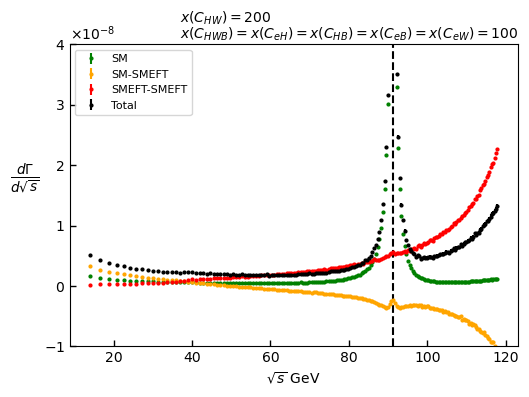

In [143]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 100
K = 0.1

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
#C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWs = 2 * C_HBs
C_HWBs = C_HBs
C_eHs = C_HBs
#C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eBs = C_HBs
C_eWs = C_eBs
C_Hboxs = np.zeros(num)
C_HDs = np.zeros(num)

sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
sqs = np.array(ss) ** 0.5

I_4_1 = np.array(rick.load(open('I_41_Tree', 'rb')))
I_6_1 = np.array(rick.load(open('I_61_Tree', 'rb')))
I_6_2 = np.array(rick.load(open('I_62_Tree', 'rb')))
I_6_3 = np.array(rick.load(open('I_63_Tree', 'rb')))
I_6_4 = np.array(rick.load(open('I_64_Tree', 'rb')))
I_6_5 = np.array(rick.load(open('I_65_Tree', 'rb')))
I_8_6 = np.array(rick.load(open('I_86_Tree', 'rb')))
I_8_7 = np.array(rick.load(open('I_87_Tree', 'rb')))
I_8_8 = np.array(rick.load(open('I_88_Tree', 'rb')))
I_8_9 = np.array(rick.load(open('I_89_Tree', 'rb')))
I_8_10 = np.array(rick.load(open('I_810_Tree', 'rb')))

ILoop_4_1 = np.array(rick.load(open('I_41_Loop-Copy1', 'rb')))
ILoop_6_1 = np.array(rick.load(open('I_61_Loop-Copy1', 'rb')))
ILoop_6_2 = np.array(rick.load(open('I_62_Loop-Copy1', 'rb')))
ILoop_6_3 = np.array(rick.load(open('I_63_Loop-Copy1', 'rb')))
ILoop_6_4 = np.array(rick.load(open('I_64_Loop-Copy1', 'rb')))
ILoop_6_5 = np.array(rick.load(open('I_65_Loop-Copy1', 'rb')))
ILoop_6_6 = np.array(rick.load(open('I_66_Loop-Copy1', 'rb')))

mas_ls = [I_4_1, I_6_1, I_6_2, I_6_3, I_6_4, I_6_5, I_8_6, I_8_7, I_8_8, I_8_9, I_8_10, ILoop_4_1, ILoop_6_1, ILoop_6_2, ILoop_6_3, ILoop_6_4, ILoop_6_5, ILoop_6_6]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / sdbins[j]

def s_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs):
    return scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)

def s_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(11, 13):
        cos_4sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_4errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def s_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 6):
        cos_6sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(13, 18):
        cos_6sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_6errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def s_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(6, 11):
        cos_8sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cos_8errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

plt.ylim(-1 * 10**-8, 0.4 * 10**-7)
#plt.ylim(10**-10, 0.4 * 10**-7)
#plt.yscale('log')
ax.yaxis.major.formatter._useMathText = True
#plt.xlim(K*m_h, (m_h ** 2 - 2 * m_h * E_phot_min)**0.5)
#plt.axvline(x = K*m_h, color = 'red', linestyle = '--')
#plt.axvline(x = (m_h ** 2 - 2 * m_h * E_phot_min)**0.5, color = 'red', linestyle = '--')
#plt.axvline(x = m_Z, linestyle = '--', color = 'black')
#plt.axvline(x = m_Z-2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
#plt.axvline(x = m_Z+2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
ax.tick_params(direction='in', length=4, width=1, right=True, top=True)
ax.tick_params(which = 'minor', direction='in', length=2, width=1, right=True, top=True)
ax.errorbar(sqs[2:178], s_4sum_init(num-1)[0][2:178],  color = 'green', label = 'SM', yerr = s_4sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqs[2:178], s_6sum_init(num-1)[0][2:178],  color = 'orange', label = 'SM-SMEFT', yerr = s_6sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqs[2:178], s_8sum_init(num-1)[0][2:178],  color = 'red', label = 'SMEFT-SMEFT', yerr = s_8sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqs[2:178], s_4sum_init(num-1)[0][2:178]+s_6sum_init(num-1)[0][2:178]+s_8sum_init(num-1)[0][2:178],  color = 'black', label = 'Total', yerr = s_4sum_init(num-1)[1][2:178]+s_6sum_init(num-1)[1][2:178]+s_8sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.text(37, 0.41*10**-7, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.text(37, 0.435*10**-7, r'$x(C_{HW})=$' +str(round(C_HWs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlabel(r'$\sqrt{s}$ GeV')
plt.legend(loc='upper left', fontsize = 8)

#plt.savefig('s.eps')    
plt.show()

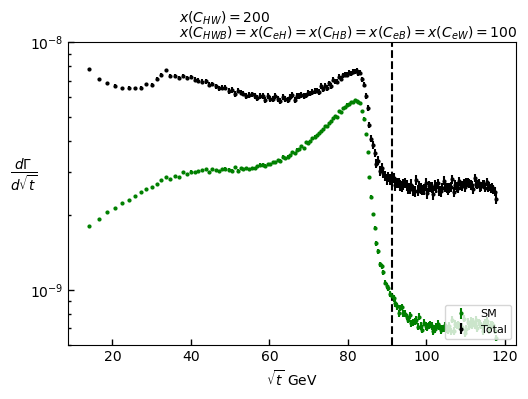

In [144]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 100

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
#C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWs = 2 * C_HBs
C_HWBs = C_HBs
C_eHs = C_HBs
#C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eBs = C_HBs
C_eWs = C_eBs
C_Hboxs = np.zeros(num)
C_HDs = np.zeros(num)

sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
sqt = np.array(ts) ** 0.5

I_4_1t = np.array(rick.load(open('I_41t_Tree', 'rb')))
I_6_1t = np.array(rick.load(open('I_61t_Tree', 'rb')))
I_6_2t = np.array(rick.load(open('I_62t_Tree', 'rb')))
I_6_3t = np.array(rick.load(open('I_63t_Tree', 'rb')))
I_6_4t = np.array(rick.load(open('I_64t_Tree', 'rb')))
I_6_5t = np.array(rick.load(open('I_65t_Tree', 'rb')))
I_8_6t = np.array(rick.load(open('I_86t_Tree', 'rb')))
I_8_7t = np.array(rick.load(open('I_87t_Tree', 'rb')))
I_8_8t = np.array(rick.load(open('I_88t_Tree', 'rb')))
I_8_9t = np.array(rick.load(open('I_89t_Tree', 'rb')))
I_8_10t = np.array(rick.load(open('I_810t_Tree', 'rb')))

ILoop_4_1t = np.array(rick.load(open('I_41t_Loop-Copy1', 'rb')))
ILoop_6_1t = np.array(rick.load(open('I_61t_Loop-Copy1', 'rb')))
ILoop_6_2t = np.array(rick.load(open('I_62t_Loop-Copy1', 'rb')))
ILoop_6_3t = np.array(rick.load(open('I_63t_Loop-Copy1', 'rb')))
ILoop_6_4t = np.array(rick.load(open('I_64t_Loop-Copy1', 'rb')))
ILoop_6_5t = np.array(rick.load(open('I_65t_Loop-Copy1', 'rb')))
ILoop_6_6t = np.array(rick.load(open('I_66t_Loop-Copy1', 'rb')))

mas_ls = [I_4_1t, I_6_1t, I_6_2t, I_6_3t, I_6_4t, I_6_5t, I_8_6t, I_8_7t, I_8_8t, I_8_9t, I_8_10t, ILoop_4_1t, ILoop_6_1t, ILoop_6_2t, ILoop_6_3t, ILoop_6_4t, ILoop_6_5t, ILoop_6_6t]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / tdbins[j]

def t_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs):
    return scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)

def t_4sum_init(i):
    cot_4sum = 0
    cot_4errsum = 0
    for j in range(0, 1):
        cot_4sum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cot_4errsum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(11, 13):
        cot_4sum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cot_4errsum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cot_4sum, cot_4errsum])

def t_6sum_init(i):
    cot_6sum = 0
    cot_6errsum = 0
    for j in range(1, 6):
        cot_6sum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cot_6errsum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    for j in range(13, 18):
        cot_6sum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cot_6errsum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cot_6sum, cot_6errsum])

def t_8sum_init(i):
    cot_8sum = 0
    cot_8errsum = 0
    for j in range(6, 11):
        cot_8sum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j]
        cot_8errsum += t_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs, C_Hboxs, C_HDs)[i, 2*j + 1]
    return np.array([cot_8sum, cot_8errsum])

ax.yaxis.major.formatter._useMathText = True
#plt.ylim(-0.5 * 10**-8, 1 * 10**-8)
plt.ylim(6*10**-10, 10**-8)
plt.yscale('log')
#plt.axvline(x = t_max(t_max_fix, m)**0.5, color = 'red', linestyle = '--')
#plt.axvline(x = t_min(t_max_fix, m)**0.5, color = 'red', linestyle = '--')
#plt.axvline(x = m_Z, linestyle = '--', color = 'black')
#plt.axvline(x = m_Z-2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
#plt.axvline(x = m_Z+2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
ax.tick_params(direction='in', length=4, width=1, right=True, top=True)
ax.tick_params(which = 'minor', direction='in', length=2, width=1, right=True, top=True)
ax.errorbar(sqt[2:178], t_4sum_init(num-1)[0][2:178],  color = 'green', label = 'SM', yerr = t_4sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqt[2:178], t_6sum_init(num-1)[0][2:178],  color = 'orange', label = 'SM-SMEFT', yerr = t_6sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqt[2:178], t_8sum_init(num-1)[0][2:178],  color = 'red', label = 'SMEFT-SMEFT', yerr = t_8sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqt[2:178], t_4sum_init(num-1)[0][2:178]+t_6sum_init(num-1)[0][2:178]+t_8sum_init(num-1)[0][2:178],  color = 'black', label = 'Total', yerr = t_4sum_init(num-1)[1][2:178]+t_6sum_init(num-1)[1][2:178]+t_8sum_init(num-1)[1][2:178], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.text(37, 1.05*10**-8, r'$x(C_{HWB})=x(C_{eH})=x(C_{HB})=x(C_{eB})=x(C_{eW})=$' +str(round(C_HWBs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.text(37, 1.2*10**-8, r'$x(C_{HW})=$' +str(round(C_HWs[num-1] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlabel(r'$\sqrt{t}$ GeV')
plt.legend(loc='lower right', fontsize = 8)
    
#plt.savefig('t simp.eps')
plt.show()